In [1]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
id_wildfire=pd.read_csv('wildfire.CSV')
id_wildfire

,INDEX,watershed,POPULATION_2010,W_STRUCTURES IN_WUI,W_%HUC_LOW_RISK,W_%HUC_LOW_MOD,W_%HUC_MODERATE,W_%HUC_MOD_HIGH,W_%HUC_HIGH,W_risk,W_risk_level
0,1,americanfalls,77212,0,0.34,0.51,0.09,0.05,0.13,49.83755,M
1,2,bear lake,9713,0,0.00,0.34,0.64,0.02,0.00,41.97045,M
2,3,beaver-camas,2403,0,0.30,0.15,0.52,0.02,0.00,28.28520,L
3,4,big lost,3998,0,0.41,0.29,0.27,0.03,0.00,30.34125,M
4,5,big wood,23221,0,0.14,0.13,0.36,0.23,0.13,55.11800,H
...,...,...,...,...,...,...,...,...,...,...,...
79,80,upper selway,0,0,0.52,0.00,0.48,0.00,0.00,0.96735,L
80,81,upper snake-rock,107887,27069,0.09,0.45,0.21,0.13,0.02,71.35260,H
81,82,upper spokane,99092,14123,0.00,0.00,0.71,0.29,0.00,87.86300,H
82,83,weiser,6771,1757,0.02,0.01,0.21,0.35,0.41,75.02625,H


In [4]:
id_wildfire=id_flood.drop(columns = ['INDEX', 'POPULATION_2010','W_risk','W_risk_level'])
id_wildfire

,watershed,W_STRUCTURES IN_WUI,W_%HUC_LOW_RISK,W_%HUC_LOW_MOD,W_%HUC_MODERATE,W_%HUC_MOD_HIGH,W_%HUC_HIGH
0,americanfalls,0,0.34,0.51,0.09,0.05,0.13
1,bear lake,0,0.00,0.34,0.64,0.02,0.00
2,beaver-camas,0,0.30,0.15,0.52,0.02,0.00
3,big lost,0,0.41,0.29,0.27,0.03,0.00
4,big wood,0,0.14,0.13,0.36,0.23,0.13
...,...,...,...,...,...,...,...
79,upper selway,0,0.52,0.00,0.48,0.00,0.00
80,upper snake-rock,27069,0.09,0.45,0.21,0.13,0.02
81,upper spokane,14123,0.00,0.00,0.71,0.29,0.00
82,weiser,1757,0.02,0.01,0.21,0.35,0.41


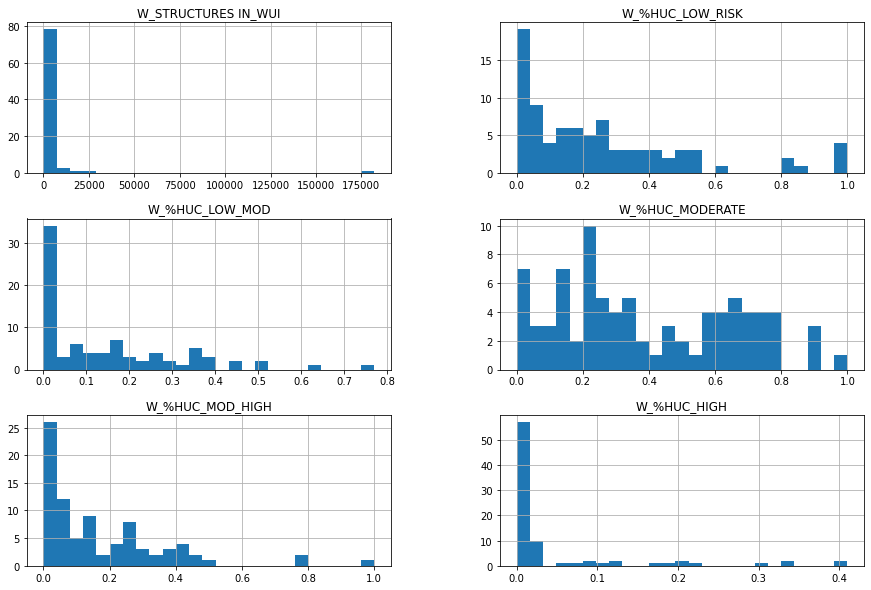

In [8]:
id_wildfire.dropna().hist(bins=25,figsize=(15, 10))
plt.savefig('wildfirefactors',dpi=600,bbox_inches = 'tight')

In [6]:
from sklearn.preprocessing import StandardScaler
id_wildfire_scale= StandardScaler().fit_transform(id_wildfire[['W_STRUCTURES IN_WUI', 'W_%HUC_LOW_RISK','W_%HUC_LOW_MOD','W_%HUC_MODERATE',
                                                              'W_%HUC_MOD_HIGH','W_%HUC_HIGH']].dropna())
id_wildfire_scale

array([[-1.98179980e-01,  3.44749242e-01,  2.19495344e+00,
        -1.12322214e+00, -6.12634954e-01,  8.96300579e-01],
       [-1.98179980e-01, -9.69808614e-01,  1.17231281e+00,
         9.40933106e-01, -7.68107268e-01, -4.70682986e-01],
       [-1.98179980e-01,  1.90095376e-01,  2.93615305e-02,
         4.90571961e-01, -7.68107268e-01, -4.70682986e-01],
       [-1.98179980e-01,  6.15393506e-01,  8.71536160e-01,
        -4.47680423e-01, -7.16283163e-01, -4.70682986e-01],
       [-1.98179980e-01, -4.28520085e-01, -9.09491310e-02,
        -1.09909565e-01,  3.20198933e-01,  8.96300579e-01],
       [-1.97829906e-01,  2.12326869e+00,  1.49672192e-01,
        -1.46099300e+00, -7.16283163e-01, -4.70682986e-01],
       [-1.98179980e-01,  3.54415108e-02,  1.23246814e+00,
        -5.60270710e-01, -1.46218010e-01, -3.65530404e-01],
       [-5.32493494e-02, -5.44510485e-01, -4.51881115e-01,
        -5.97800805e-01,  1.64726619e-01,  3.10450480e+00],
       [-1.00159264e-01, -3.12529686e-01, -6.323

In [7]:
id_wildfire_scale=pd.DataFrame(id_wildfire_scale,columns=['W_STRUCTURES IN_WUI', 'W_%HUC_LOW_RISK','W_%HUC_LOW_MOD','W_%HUC_MODERATE',
                                                              'W_%HUC_MOD_HIGH','W_%HUC_HIGH'])
id_wildfire_scale

,W_STRUCTURES IN_WUI,W_%HUC_LOW_RISK,W_%HUC_LOW_MOD,W_%HUC_MODERATE,W_%HUC_MOD_HIGH,W_%HUC_HIGH
0,-0.198180,0.344749,2.194953,-1.123222,-0.612635,0.896301
1,-0.198180,-0.969809,1.172313,0.940933,-0.768107,-0.470683
2,-0.198180,0.190095,0.029362,0.490572,-0.768107,-0.470683
3,-0.198180,0.615394,0.871536,-0.447680,-0.716283,-0.470683
4,-0.198180,-0.428520,-0.090949,-0.109910,0.320199,0.896301
...,...,...,...,...,...,...
79,-0.198180,1.040692,-0.872968,0.340452,-0.871755,-0.470683
80,1.155556,-0.621837,1.834021,-0.672861,-0.198042,-0.260378
81,0.508119,-0.969809,-0.872968,1.203644,0.631144,-0.470683
82,-0.110311,-0.892482,-0.812813,-0.672861,0.942088,3.840573
